In [8]:
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Speedlimit dataset

In [2]:
url = 'https://www.iihs.org/topics/speed/speed-limit-laws'
html = requests.get(url).content
df_list = pd.read_html(html)
speeddf = df_list[-1]
speeddf.columns =['StateFull', 'Rural_int', 'Urban_int', 1, 2]
speeddf = speeddf[['StateFull', 'Rural_int', 'Urban_int']]
speeddf.head(5)

,StateFull,Rural_int,Urban_int
0,Alabama,70,65
1,Alaska,65,55
2,Arizona,75,65
3,Arkansas,75 trucks: 70,65
4,California,70; trucks: 55,65 trucks: 55


In [3]:
def clean(val):
    if type(val) != int:
        if val != val:
            return 55
        return int(val[:2]) 
    return val
    
speeddf['Rural_int'] = speeddf['Rural_int'].map(clean)
speeddf['Urban_int'] = speeddf['Urban_int'].map(clean)
speeddf.head(5)

C:\Users\vanga\AppData\Local\Temp\ipykernel_6808\1164351897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeddf['Rural_int'] = speeddf['Rural_int'].map(clean)
C:\Users\vanga\AppData\Local\Temp\ipykernel_6808\1164351897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeddf['Urban_int'] = speeddf['Urban_int'].map(clean)


,StateFull,Rural_int,Urban_int
0,Alabama,70,65
1,Alaska,65,55
2,Arizona,75,65
3,Arkansas,75,65
4,California,70,65


### Accidents dataset

In [5]:
df = pd.read_pickle('US_Accidents_June20_Cleaned.pkl')

In [6]:
df.head(3)

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance_mi,Description,Street,...,Traffic_Signal,Sunrise_Sunset,Rain_Bool,Snow_Bool,Thunder_Bool,Wind_Bool,Fog_Bool,Hail_Bool,Sand_Dust_Bool,StateFull
0,A-1,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,1.0,True,False,False,False,False,False,False,Ohio
1,A-2,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,1.0,True,False,False,False,False,False,False,Ohio
2,A-3,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,True,1.0,False,False,False,False,False,False,False,Ohio


In [7]:
tempdf = df.groupby('StateFull', as_index=False)['Severity'].mean()
tempdf.head(5)

,StateFull,Severity
0,Alabama,2.335134
1,Arizona,2.174209
2,California,2.290141
3,Colorado,2.542619
4,Connecticut,2.621598


### Speed limit and accidents combined

In [8]:
newdf = pd.merge(speeddf, tempdf, on='StateFull')
newdf.head(5)

,StateFull,Rural_int,Urban_int,Severity
0,Alabama,70,65,2.335134
1,Arizona,75,65,2.174209
2,California,70,65,2.290141
3,Colorado,75,65,2.542619
4,Connecticut,65,55,2.621598


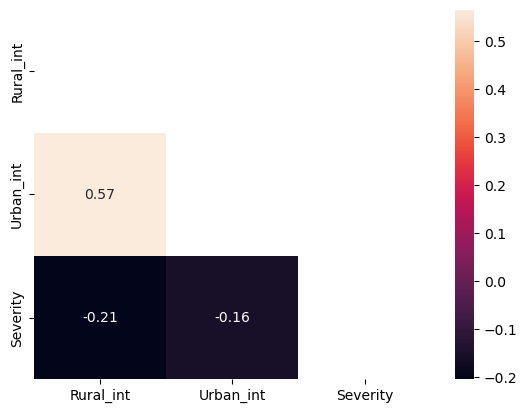

In [9]:
corr_matrix = newdf[['Rural_int', 'Urban_int', 'Severity']].corr()
corr = np.triu(corr_matrix)
# sb.set(font_scale=0.8)
sb.heatmap(corr_matrix, annot=True, mask=corr)
plt.show()

### Vechicle/Population dataset

In [10]:
popdf = pd.read_pickle('Vehicle_Population_Stats.pkl')

In [11]:
popdf.head(5)

,Automobiles_2016,Buses_2016,Trucks_2016,Motorcycles_2016,All_2016,Automobiles_2017,Buses_2017,Trucks_2017,Motorcycles_2017,All_2017,...,Trucks_2019,Motorcycles_2019,All_2019,Automobiles_2020,Buses_2020,Trucks_2020,Motorcycles_2020,All_2020,Population_2020,Licensed_Drivers
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2284443,6238,3067917,109703,5468301,2065463,5682,2872743,112185,5056073,...,3065778,107730,5288208,2035376.0,5624.0,3164439.0,114901.0,5320340.0,5024279,4042900
Alaska,183259,8119,571287,31949,794614,173487,8080,591079,31859,804505,...,579985,28129,795275,171144.0,8620.0,586281.0,26781.0,792826.0,733391,518872
Arizona,2377962,9016,3233330,166583,5786891,2391624,9051,3399704,164055,5964434,...,3407708,160486,5982559,2410018.0,8486.0,3514203.0,121074.0,6053781.0,7151502,5681495
Arkansas,942604,11931,1762765,90838,2808138,926789,11941,1805510,89457,2833697,...,1833636,169796,2902111,872437.0,12044.0,1859091.0,169797.0,2913369.0,3011524,2153929
California,14768392,98622,14511913,842106,30221033,14860967,99917,14991714,842543,30795141,...,15443454,808377,31247270,14201400.0,100828.0,15310597.0,785424.0,30398249.0,39538223,27005302


In [12]:
popdf = popdf[['Automobiles_2016', 'Automobiles_2017', 'Automobiles_2018', 'Automobiles_2019', 'Automobiles_2020', 'Population_2020', 'Licensed_Drivers']]
popdf.head(5)

,Automobiles_2016,Automobiles_2017,Automobiles_2018,Automobiles_2019,Automobiles_2020,Population_2020,Licensed_Drivers
State,,,,,,,
Alabama,2284443,2065463,2161212,2109108,2035376.0,5024279,4042900
Alaska,183259,173487,183270,178516,171144.0,733391,518872
Arizona,2377962,2391624,2391772,2405959,2410018.0,7151502,5681495
Arkansas,942604,926789,921161,886647,872437.0,3011524,2153929
California,14768392,14860967,15065827,14894912,14201400.0,39538223,27005302


In [13]:
popdf=popdf.rename(columns = {'State':'StateFull'})
popdf.head(5)

,Automobiles_2016,Automobiles_2017,Automobiles_2018,Automobiles_2019,Automobiles_2020,Population_2020,Licensed_Drivers
State,,,,,,,
Alabama,2284443,2065463,2161212,2109108,2035376.0,5024279,4042900
Alaska,183259,173487,183270,178516,171144.0,733391,518872
Arizona,2377962,2391624,2391772,2405959,2410018.0,7151502,5681495
Arkansas,942604,926789,921161,886647,872437.0,3011524,2153929
California,14768392,14860967,15065827,14894912,14201400.0,39538223,27005302


#### Vechicle/Population dataset analysis

In [30]:
popdf['auto_per_pers'] = popdf['Automobiles_2020'] / popdf['Population_2020']
popdf['auto_per_driver'] = popdf['Automobiles_2020'] / popdf['Licensed_Drivers']

popdf['percentage_driver'] = popdf['Licensed_Drivers'] / popdf['Population_2020'] * 100
popdf.head()

,Automobiles_2016,Automobiles_2017,Automobiles_2018,Automobiles_2019,Automobiles_2020,Population_2020,Licensed_Drivers,auto_per_pers,auto_per_driver,percentage_driver
State,,,,,,,,,,
Alabama,2284443,2065463,2161212,2109108,2035376.0,5024279,4042900,0.405108,0.503445,80.467267
Alaska,183259,173487,183270,178516,171144.0,733391,518872,0.233360,0.329839,70.749709
Arizona,2377962,2391624,2391772,2405959,2410018.0,7151502,5681495,0.336995,0.424187,79.444780
Arkansas,942604,926789,921161,886647,872437.0,3011524,2153929,0.289700,0.405044,71.522890
California,14768392,14860967,15065827,14894912,14201400.0,39538223,27005302,0.359182,0.525875,68.301760


<AxesSubplot:xlabel='State'>

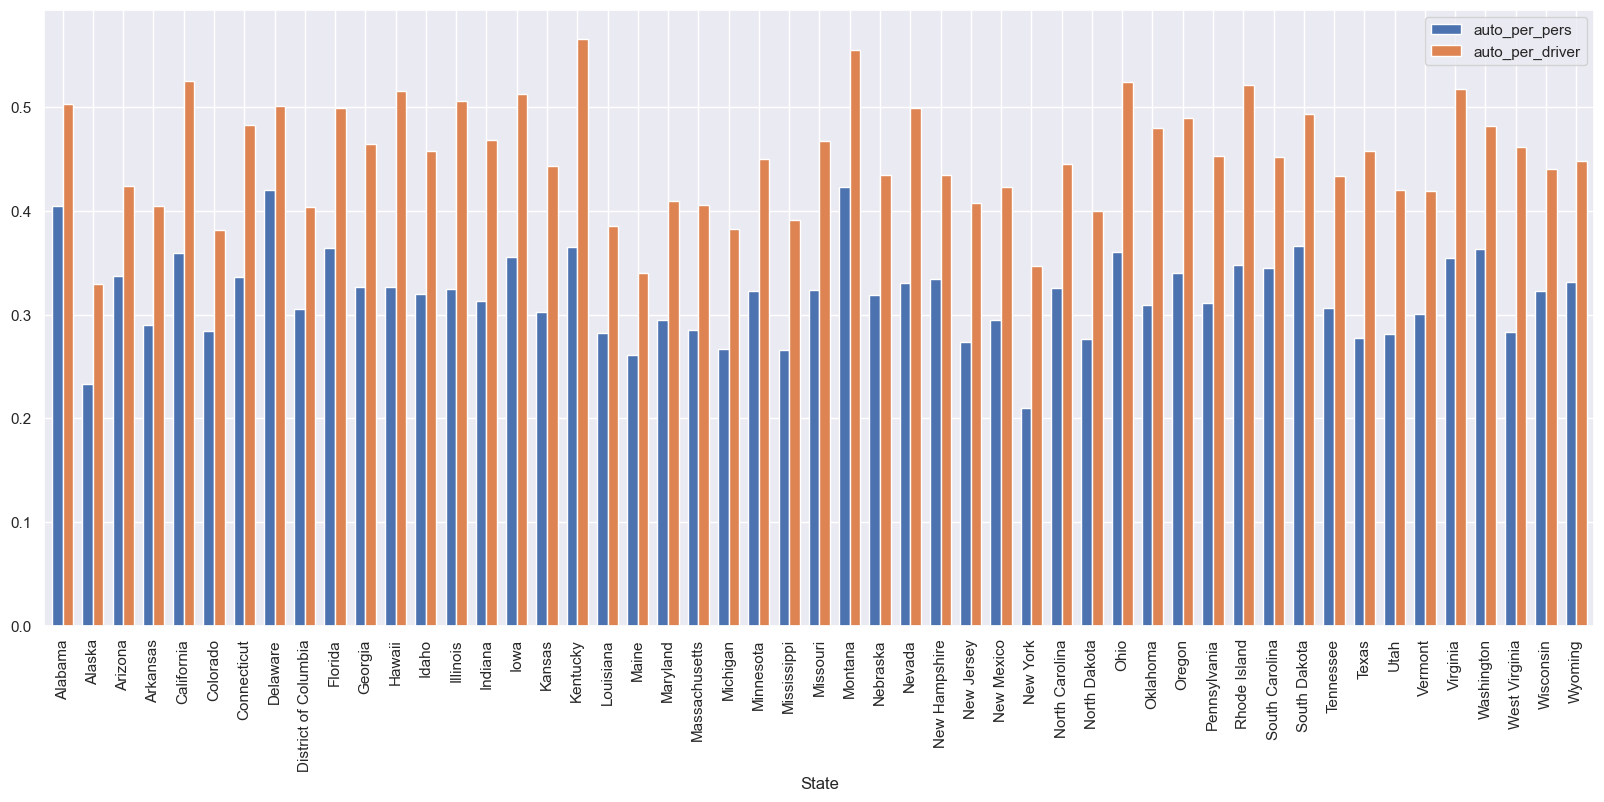

In [50]:
popdf.plot(y=['auto_per_pers', 'auto_per_driver'], kind='bar', width = 0.7, figsize=(20,8))

### Merge accidents and vehicle/population datasets

In [17]:
countsevdf = df.groupby('StateFull', as_index=False)['Severity'].count()
countsevdf=countsevdf.rename(columns = {'StateFull':'State', 'Severity':'Nr_accidents'})
countsevdf.set_index('State', inplace=True)
countsevdf
totaldf = pd.concat([popdf, countsevdf], axis=1)
totaldf.dropna(inplace=True)
totaldf.head(5)

,Automobiles_2016,Automobiles_2017,Automobiles_2018,Automobiles_2019,Automobiles_2020,Population_2020,Licensed_Drivers,auto_per_pers,auto_per_driver,percentage_driver,Nr_accidents
State,,,,,,,,,,,
Alabama,2284443,2065463,2161212,2109108,2035376.0,5024279,4042900,0.405108,0.503445,0.804673,44624.0
Arizona,2377962,2391624,2391772,2405959,2410018.0,7151502,5681495,0.336995,0.424187,0.794448,78578.0
California,14768392,14860967,15065827,14894912,14201400.0,39538223,27005302,0.359182,0.525875,0.683018,816607.0
Colorado,1807777,1785058,1798177,1741218,1639028.0,5773714,4299447,0.283878,0.381218,0.744659,49731.0
Connecticut,1352381,1302339,1306709,1260954,1211171.0,3605944,2508670,0.335882,0.482794,0.695704,25901.0


### Accidents per vehicle

In [18]:
totaldf['acc_per_dri'] = totaldf['Nr_accidents'] / totaldf['Licensed_Drivers'] * 100
totaldf = totaldf.sort_values('acc_per_dri', ascending = False)
totaldf.head(5)

,Automobiles_2016,Automobiles_2017,Automobiles_2018,Automobiles_2019,Automobiles_2020,Population_2020,Licensed_Drivers,auto_per_pers,auto_per_driver,percentage_driver,Nr_accidents,acc_per_dri
State,,,,,,,,,,,,
South Carolina,1840357,1808401,1830186,1801243,1767348.0,5118425,3905911,0.345291,0.452480,0.763108,173277.0,4.436276
Oregon,1483576,1542461,1488623,1424799,1440848.0,4237256,2944828,0.340043,0.489281,0.694985,90091.0,3.059296
California,14768392,14860967,15065827,14894912,14201400.0,39538223,27005302,0.359182,0.525875,0.683018,816607.0,3.023877
Utah,940604,925052,937421,921645,902723.0,3205958,2149766,0.281577,0.419917,0.670553,51631.0,2.401703
Oklahoma,1379222,1337624,1296219,1255134,1223848.0,3959353,2550560,0.309103,0.479835,0.644186,60003.0,2.352542


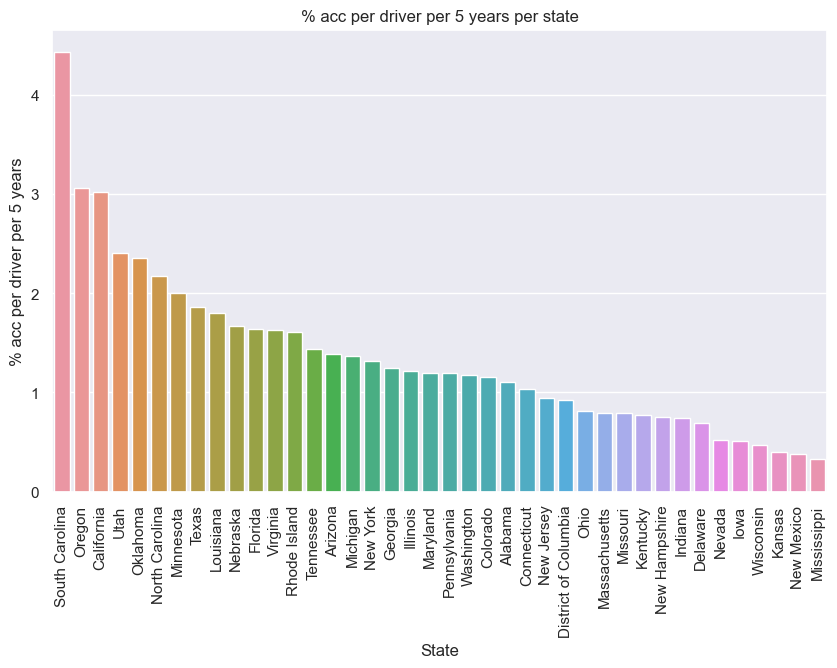

In [20]:
ax = sb.barplot(x=totaldf.index, y='acc_per_dri', data=totaldf, ci=False)
ax.set(xlabel='State', ylabel='% acc per driver per 5 years', title='% acc per driver per 5 years per state')
ax.tick_params(axis='x', rotation=90)
sb.set(rc={'figure.figsize':(10,6)})

In [51]:
totaldf.to_csv('PowerBItest.csv', index=True)

### No. accidents per precipitation

#### Weather ds

In [ ]:
weatherdf = pd.read_csv(r'C:\Users\vanga\Documents\Working Talent\Data - Opdracht 2\WeatherEvents_Jan2016-Dec2021.csv')

In [ ]:
weatherdf.head(2)

In [ ]:
weatherdf.rename(columns={
    'StartTime(UTC)': 'StartTime_UTC', 
    'EndTime(UTC)': 'EndTime_UTC',
    'Precipitation(in)': 'Precipitation_in'
}, inplace=True)

In [ ]:
weatherdf['StartTime_UTC'] = pd.to_datetime(weatherdf['StartTime_UTC'], format='%Y/%m/%d %H:%M:%S')
weatherdf['EndTime_UTC'] = pd.to_datetime(weatherdf['EndTime_UTC'], format='%Y/%m/%d %H:%M:%S')
weatherdf['StartTime_UTC'] = pd.DatetimeIndex(weatherdf['StartTime_UTC']).year
weatherdf['EndTime_UTC'] = pd.DatetimeIndex(weatherdf['EndTime_UTC']).year

In [ ]:
weatherdf = weatherdf.groupby(['State', 'StartTime_UTC'], as_index=False)['Precipitation_in'].sum()
weatherdf = weatherdf.rename(columns = {'StartTime_UTC':'Year', 'size':'Precipitation_in'})
weatherdf.head(10)

In [ ]:
weatherdf = weatherdf[weatherdf.Year != 2021]
weatherdf.head(10)

#### Accidents ds

In [ ]:
accidentsdf = pd.read_pickle('US_Accidents_June20_Cleaned.pkl')

In [ ]:
accidentsdf.head(2)

In [ ]:
accidentsdf['Start_Time'] = pd.to_datetime(accidentsdf['Start_Time'], format='%Y/%m/%d %H:%M:%S')
accidentsdf['End_Time'] = pd.to_datetime(accidentsdf['End_Time'], format='%Y/%m/%d %H:%M:%S')
accidentsdf['Start_Time'] = pd.DatetimeIndex(accidentsdf['Start_Time']).year
accidentsdf['End_Time'] = pd.DatetimeIndex(accidentsdf['End_Time']).year

In [ ]:
accidentsdf = accidentsdf.groupby(['State', 'Start_Time'], as_index=False)['Severity'].count()
accidentsdf = accidentsdf.rename(columns = {'Start_Time':'Year', 'Severity':'No_accidents'})
accidentsdf.head(10)

#### Merge

In [ ]:
totaldf = pd.merge(weatherdf, accidentsdf, on=['State', 'Year'])
totaldf.head(10)

In [ ]:
# totaldf.to_csv('weather_accidents.csv')

#### Accidents per driving age

#### Accidents per speed limit

##### Speed limit

In [ ]:
speeddf = pd.read_csv('DATA/speedlimit_data.csv')
speeddf.head()

##### Accidents

In [ ]:
accidentsdf = pd.read_pickle('US_Accidents_June20_Cleaned.pkl')

In [ ]:
accidentsdf['Start_Time'] = pd.DatetimeIndex(accidentsdf['Start_Time']).year
accidentsdf['End_Time'] = pd.DatetimeIndex(accidentsdf['End_Time']).year
accidentsdf = accidentsdf[(accidentsdf.Start_Time == 2016) | (accidentsdf.Start_Time == 2017) | (accidentsdf.Start_Time == 2018)]

In [ ]:
accidentsdf = accidentsdf.groupby('StateFull', as_index=False)['Start_Time'].count()
accidentsdf = accidentsdf.rename(columns = {'StateFull':'State', 'Start_Time':'No_accidents'})
accidentsdf.head()

##### Licensed

In [ ]:
licensedf = pd.read_csv('DATA/license_data.csv')

In [ ]:
# keep_years = ['2016', '2017', '2018', '2019', '2020']
keep_years = [2016, 2017, 2018, 2019, 2020]
# licensedf.loc[licensedf['Year'] == keep_years]
licensedf = licensedf[(licensedf.Year == keep_years[0]) | (licensedf.Year == keep_years[1]) | (licensedf.Year == keep_years[2]) | (licensedf.Year == keep_years[3]) | (licensedf.Year == keep_years[4])]

In [ ]:
# licensedf.Year.unique()

In [ ]:
licensedf = licensedf.groupby('State', as_index=False)['Drivers'].sum()
licensedf['Drivers'] = licensedf['Drivers']/3
licensedf.head()

##### Merge

In [ ]:
tempdf = pd.merge(speeddf, accidentsdf, on='State')
mergedf = pd.merge(tempdf, licensedf, on='State')

In [ ]:
mergedf['acc_per_driver'] = mergedf['No_accidents'] / mergedf['Drivers']*100
mergedf.head()

In [ ]:
mergedf = mergedf.sort_values('acc_per_driver', ascending = False)
ax = sb.barplot(x='State', y='acc_per_driver', data=mergedf, ci=False)
ax.set(xlabel='State', ylabel='% acc per driver per 3 years', title='% acc per driver per 3 years per state')
ax.tick_params(axis='x', rotation=90)
sb.set(rc={'figure.figsize':(10,6)})

In [ ]:
corr_matrix = mergedf[['Rural_Interstate', 'Urban_Interstate', 'acc_per_driver']].corr()
corr = np.triu(corr_matrix)
sb.set(font_scale=0.8)
sb.heatmap(corr_matrix, annot=True, mask=corr)
# plt.show()

In [100]:
# mergedf.to_csv('acc_per_driver_3y.csv')